## Task 2: object detection in videos challenge. The task is similar to Task 1, except that objects are required to be detected from videos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as io
import cv2
import torch
import os
import sys
from utils.utils_funcitons import *
device= "cuda" if torch.cuda.is_available() else "cpu"
from ultralytics import YOLO

### Paths

In [12]:
dataset_path = r'.\dataset\Task2_Video_detection'
#model_path = r'.\runs\detect\yolov8s\train_yolov8s\weights\best.pt'
#model_path = r'.\runs\detect\yolov8n\train\weights\best.pt'
model_path = r'.\models\best_yolov8n.pt'

### YOLO detector class

In [10]:
class YOLO_detector():
    def __init__(self, model):
        self.model = model
    
    def detect(self, image, objects=['all'], conf_thresh=0.5, imgsz=640):
        result_boxes = predict(self.model, image, mode='detection', plot=False, conf_thresh=conf_thresh, objects=objects, imgsz=imgsz)
        return result_boxes

    def draw(self, image, boxes):
        output_image = draw_boxes(image, boxes)
        return output_image

model = YOLO(model_path)
detector = YOLO_detector(model)

### Example Test

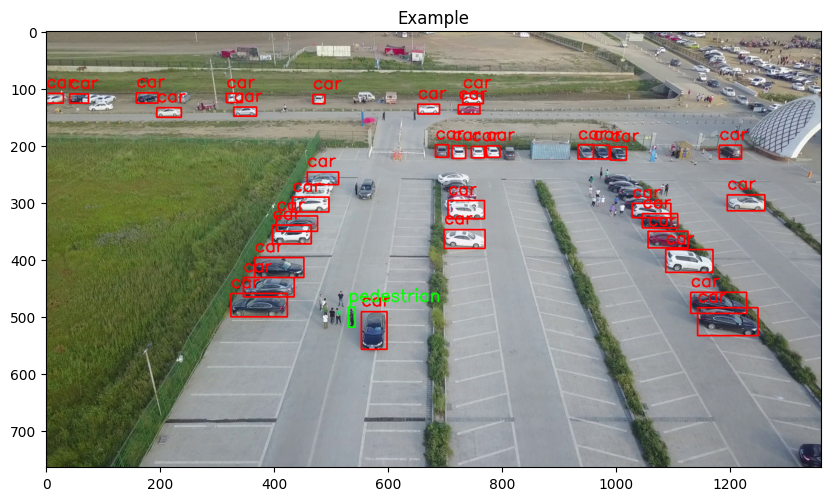

In [11]:
image_example = io.imread(os.path.join(dataset_path, r'sequences\uav0000009_03358_v\0000120.jpg'))
image_example = cv2.cvtColor(image_example, cv2.COLOR_RGB2BGR) 
#display_image(image_example)

result_boxes = detector.detect(image_example, objects=['all'], conf_thresh=0.6)
output_image = detector.draw(image_example, result_boxes[0])
if len(output_image) > 0:
    display_image(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

### Video Processing

The dataset gives us the video as images for each frame

In [6]:
# Images folder path
img_folder = os.path.join(dataset_path, r'sequences\uav0000009_03358_v')
#img_folder = os.path.join(dataset_path, r'sequences\uav0000120_04775_v')
#img_folder = os.path.join(dataset_path, r'sequences\uav0000370_00001_v')
img_names = sorted(os.listdir(img_folder))

# Video size
width, height = 1280, 720

# Codec and VideoWriter
codec = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
output_video = cv2.VideoWriter(r'.\outputs\output_3.mp4', codec, fps, (width, height))

# Frame processing
for img in img_names:
    img_fullpath = os.path.join(img_folder, img)
    frame = cv2.imread(img_fullpath)
    if frame is not None:
        # Redimensionar la imagen si es necesario
        if width and height:
            result_boxes = detector.detect(frame, objects=['all'], conf_thresh=0.6, imgsz=640) #imgsz_n=1024 ; imgsz_s=720
            frame_detected = detector.draw(frame, result_boxes[0]) #Detections is in BGR format
            # Detection control. If no detections were found, use the original frame
            if len(frame_detected) > 0:
                #frame_detected = cv2.cvtColor(frame_detected, cv2.COLOR_BGR2RGB) 
                frame_detected = cv2.resize(frame_detected, (width, height))
            else:
                frame_detected = cv2.resize(frame, (width, height))
        output_video.write(frame_detected)

# Liberar recursos
output_video.release()
cv2.destroyAllWindows()